<a href="https://colab.research.google.com/github/tllussa/TFM-UOC-MU-DATA-SCIENCE/blob/main/An%C3%A0lisisDadesHist%C3%B2riques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import plotly.graph_objects as go
import math
from matplotlib.cbook import boxplot_stats

## Càrrega de les dades

In [2]:
# Code to read csv file into Colaboratory:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['SentDATA.csv']))
# Dataset is now stored in a Pandas Dataframe

df.reset_index(inplace=True)
df['Time'] = pd.to_datetime(df['Time'])
df = df.set_index('Time')

Saving SentDATA.csv to SentDATA.csv


## Anàlisis estadístic

In [13]:
print("Head")
df.head()

Head


,index,PM 1,PM 2.5,PM 10,PM 1 ATM,PM 2.5 ATM,PM 10 ATM
Time,,,,,,,
2019-09-16 10:53:47,0,9,13,15,9,13,15
2019-09-16 11:03:47,1,10,14,16,10,14,16
2019-09-16 11:14:31,2,9,13,15,9,13,15
2019-09-16 12:40:41,3,10,14,16,10,14,16
2019-09-16 13:12:30,4,9,13,15,9,13,15


In [14]:
#Summary statistics
#count: nombre de registres
#mean: valor mitjà
#std: desviació estàndard
#min, max: valor mínim i màxim
#25% , 50% , 75% percentils
print ("Summary statistics:")
df.describe().T

Summary statistics:


,count,mean,std,min,25%,50%,75%,max
index,4989.0,2494.000000,1440.344577,0.0,1247.0,2494.0,3741.0,4988.0
PM 1,4989.0,5.161355,6.405865,-97.0,2.0,3.0,7.0,127.0
PM 2.5,4989.0,7.285027,7.626725,-70.0,3.0,4.0,10.0,127.0
PM 10,4989.0,10.649629,8.625245,-65.0,6.0,7.0,14.0,127.0
PM 1 ATM,4989.0,5.156945,5.620091,-116.0,2.0,3.0,7.0,127.0
PM 2.5 ATM,4989.0,7.323913,7.775398,-13.0,3.0,4.0,10.0,127.0
PM 10 ATM,4989.0,10.552215,8.258378,-104.0,6.0,7.0,14.0,83.0


In [15]:
#Info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4989 entries, 2019-09-16 10:53:47 to 2019-11-18 23:07:07
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   index       4989 non-null   int64
 1   PM 1        4989 non-null   int64
 2   PM 2.5      4989 non-null   int64
 3   PM 10       4989 non-null   int64
 4   PM 1 ATM    4989 non-null   int64
 5   PM 2.5 ATM  4989 non-null   int64
 6   PM 10 ATM   4989 non-null   int64
dtypes: int64(7)
memory usage: 311.8 KB


## Transformació de dades

In [16]:
columns = ['PM1','PM25','PM10','PM1ATM','PM25ATM','PM10ATM']

df1 = df.copy();

df1 = df1.rename(columns={"PM 1":"PM1","PM 2.5":"PM25","PM 10":"PM10","PM 1 ATM":"PM1ATM","PM 2.5 ATM":"PM25ATM","PM 10 ATM":"PM10ATM"})

df1['PM1'] = df['PM 1'].astype(np.float32)
df1['PM25'] = df['PM 2.5'].astype(np.float32)
df1['PM10'] = df['PM 10'].astype(np.float32)
df1['PM1ATM'] = df['PM 1 ATM'].astype(np.float32)
df1['PM25ATM'] = df['PM 2.5 ATM'].astype(np.float32)
df1['PM10ATM'] = df['PM 10 ATM'].astype(np.float32)

In [17]:
#Info of dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4989 entries, 2019-09-16 10:53:47 to 2019-11-18 23:07:07
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    4989 non-null   int64  
 1   PM1      4989 non-null   float32
 2   PM25     4989 non-null   float32
 3   PM10     4989 non-null   float32
 4   PM1ATM   4989 non-null   float32
 5   PM25ATM  4989 non-null   float32
 6   PM10ATM  4989 non-null   float32
dtypes: float32(6), int64(1)
memory usage: 194.9 KB


## Anàlisis exploratori de les dades

In [18]:
for column in columns:
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df1.index, y=df1[column], name=column))
    fig.update_layout(showlegend=True, title='Sensor '+column)
    fig.show()

In [19]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df1.index, y=df1['PM1'], name='PM1'))
fig.add_trace(go.Scatter(x=df1.index, y=df1['PM25'], name='PM25'))
fig.add_trace(go.Scatter(x=df1.index, y=df1['PM10'], name='PM10'))
fig.add_trace(go.Scatter(x=df1.index, y=df1['PM1ATM'], name='PM1ATM'))
fig.add_trace(go.Scatter(x=df1.index, y=df1['PM25ATM'], name='PM25ATM'))
fig.add_trace(go.Scatter(x=df1.index, y=df1['PM10ATM'], name='PM10ATM'))
fig.update_layout(showlegend=True, title='Telemetria dels sensors de particulat',xaxis_title='Data',yaxis_title='µg/m3')
fig.show()

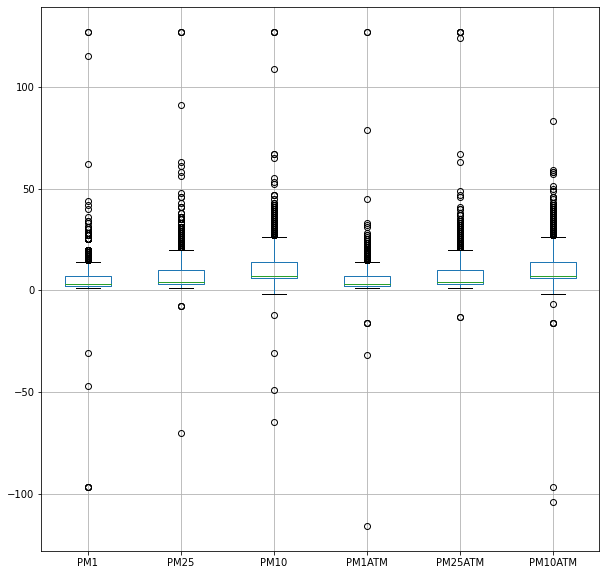

In [20]:
df1.boxplot(column=columns,figsize=(10,10))

In [21]:
df2 = df1.copy()

In [24]:
stats = boxplot_stats(df2.values)

for x in range(1, 7):
  print(columns[x-1])
  print("   Outliers: size: ",stats[x]['fliers'].size,", min: ",stats[x]['fliers'].min(),", max:",stats[x]['fliers'].max())
  print("   iqr:",stats[x]['iqr'])
  print("   mean:",stats[x]['iqr'])
  print("   med:",stats[x]['med'])
  print("   q1:",stats[x]['q1'])
  print("   q3:",stats[x]['q3'])
  print("   whishi:",stats[x]['whishi']) 
  print("   whislo:",stats[x]['whislo'])


PM1
   Outliers: size:  280 , min:  -97.0 , max: 127.0
   iqr: 5.0
   mean: 5.0
   med: 3.0
   q1: 2.0
   q3: 7.0
   whishi: 14.0
   whislo: 1.0
PM25
   Outliers: size:  279 , min:  -70.0 , max: 127.0
   iqr: 7.0
   mean: 7.0
   med: 4.0
   q1: 3.0
   q3: 10.0
   whishi: 20.0
   whislo: 1.0
PM10
   Outliers: size:  274 , min:  -65.0 , max: 127.0
   iqr: 8.0
   mean: 8.0
   med: 7.0
   q1: 6.0
   q3: 14.0
   whishi: 26.0
   whislo: -2.0
PM1ATM
   Outliers: size:  279 , min:  -116.0 , max: 127.0
   iqr: 5.0
   mean: 5.0
   med: 3.0
   q1: 2.0
   q3: 7.0
   whishi: 14.0
   whislo: 1.0
PM25ATM
   Outliers: size:  279 , min:  -13.0 , max: 127.0
   iqr: 7.0
   mean: 7.0
   med: 4.0
   q1: 3.0
   q3: 10.0
   whishi: 20.0
   whislo: 1.0
PM10ATM
   Outliers: size:  274 , min:  -104.0 , max: 83.0
   iqr: 8.0
   mean: 8.0
   med: 7.0
   q1: 6.0
   q3: 14.0
   whishi: 26.0
   whislo: -2.0
